<a href="https://colab.research.google.com/github/AlJ95/VanPixel/blob/master/NN_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import PIL.Image as img
import torch.nn as nn
import torch
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(3, 18, 1, dilation=1)
        self.conv2 = nn.Conv2d(18, 36, 1)
        self.conv3 = nn.Conv2d(36, 54, 1)

        self.unconv1 = nn.Conv2d(54, 36, 1)
        self.unconv2 = nn.Conv2d(36, 18, 1)
        self.unconv3 = nn.Conv2d(18, 3, 1)

        # an affine operation: y = Wx + b
        #self.fc1 = nn.Linear(54 * 58 * 58, 1080 * 8) 
        #self.fc2 = nn.Linear(1080 * 8, 1080 * 4)
        #self.fc3 = nn.Linear(1080 * 4, 1080 * 2)
        #self.fc4 = nn.Linear(1080 * 2, 1080)
        #self.fc5 = nn.Linear(1080, 512)
        #self.fc6 = nn.Linear(512, 256)
        #self.fc7 = nn.Linear(256, 128)
        #self.fc8 = nn.Linear(128, 64)

    def forward(self, x):
        pool = nn.MaxPool2d((4, 3), return_indices=True)
        poolQ = nn.MaxPool2d((3, 3), return_indices=True)
        unpool = nn.MaxUnpool2d((4, 3))
        unpoolQ = nn.MaxUnpool2d((3, 3))

        # Max pooling over a (2, 2) window
        output1, indices1 = pool(F.relu(self.conv1(x)))
        print(output1.shape)
        output2, indices2 = pool(F.relu(self.conv2(output1)))
        print(output2.shape)
        output3, indices3 = poolQ(F.relu(self.conv3(output2)))
        print(output3.shape)
        output4 = output3.view(-1, self.num_flat_features(output3))
        print(output4.shape)

        # # #
        #x = F.relu(self.fc1(x))
        #print(x.shape)
        # # # 

        output3 = output4.view(-1, 54, 40, 40)
        print(output3.shape)
        output2 = unpoolQ(output3, indices3)
        output2 = self.unconv1(output2)
        print(output2.shape)
        print(indices2.shape)
        output1 = unpool(output2, indices2)
        output1 = self.unconv2(output1)
        print(output1.shape)
        output = unpool(output1, indices1)
        output2 = self.unconv3(output1)
        print(output.shape)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features



net = Net()

In [39]:
input = torch.randn(1,3,1920,1080)
out = net(input)
print(out.shape)

torch.Size([1, 18, 479, 359])
torch.Size([1, 36, 119, 119])
torch.Size([1, 54, 39, 39])
torch.Size([1, 82134])


RuntimeError: ignored

# Neuer Abschnitt

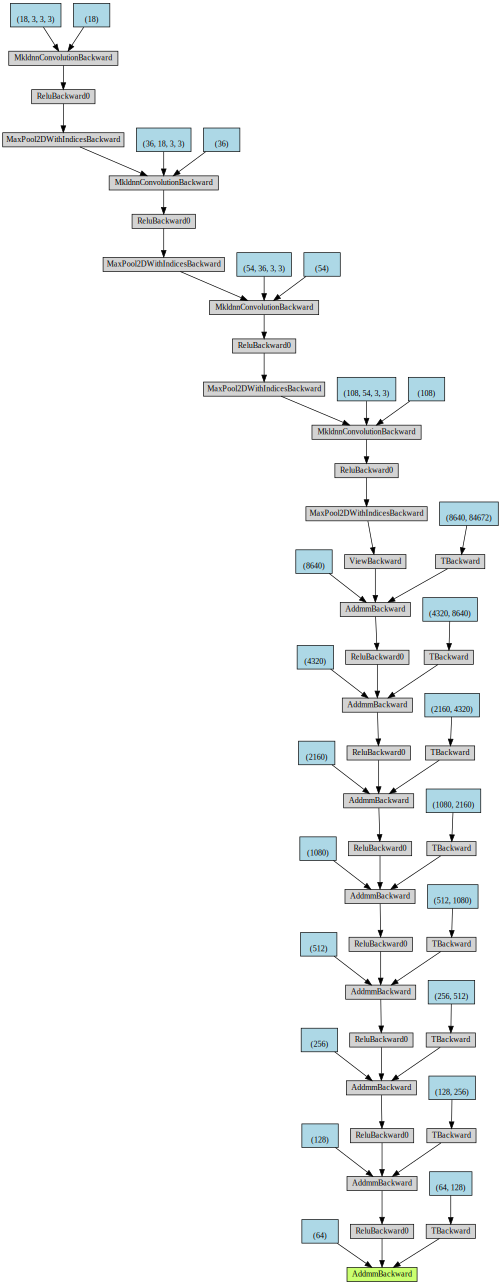

In [6]:
!pip install torchviz #git+https://github.com/szagoruyko/pytorchviz
from torchviz import make_dot
make_dot(out)